In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
df1 = df.drop(['Radio', 'Newspaper'], axis=1)
df1

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [4]:
df1.corr()

,TV,Sales
TV,1.000000,0.901208
Sales,0.901208,1.000000


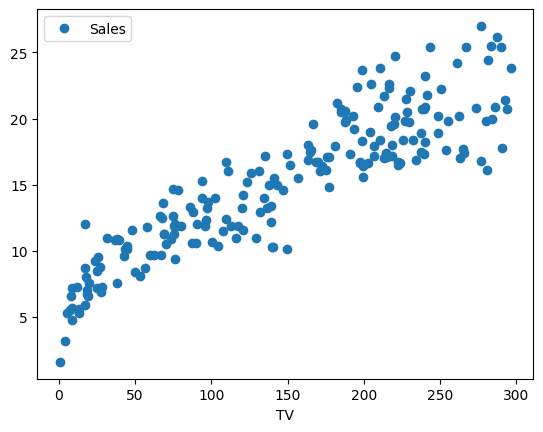

In [5]:
df1.plot(x='TV' , y='Sales', style='o');

<Figure size 1600x900 with 0 Axes>

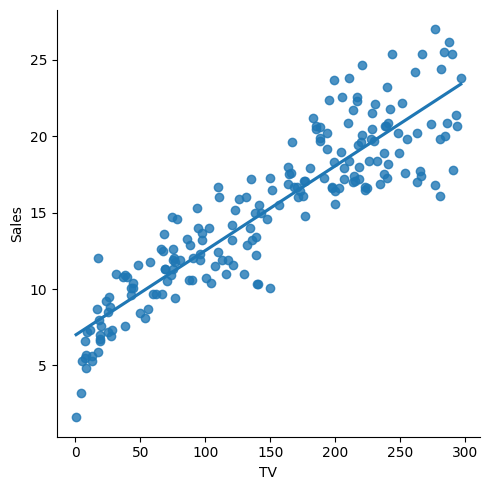

In [6]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='TV', y='Sales', data=df1, ci=None);

In [7]:
# simple_linear_regression   y = mx + c

import sklearn
from sklearn.linear_model import LinearRegression

In [8]:
X = df1[['TV']]
y = df1['Sales']
model = LinearRegression() 
model.fit(X,y)

LinearRegression()

In [9]:
model.intercept_  #Y-intercept

6.9748214882298925

In [10]:
model.coef_  #slope

array([0.05546477])

In [11]:
model.score(X, y) # R-squared

0.8121757029987414

In [12]:
#predicting
predictions = model.predict(X)
predictions

array([19.73726517,  9.44300377,  7.92881554, 15.37773421, 17.00285199,
        7.45736499, 10.16404579, 13.6416869 ,  7.45181851, 18.05668263,
       10.64104282, 18.88310771,  8.29488303, 12.38263661, 18.29518114,
       17.81263764, 10.73533293, 22.5826079 , 10.8129836 , 15.14478218,
       19.08832736, 20.142158  ,  7.70695646, 19.63742859, 10.43027669,
       21.55650964, 14.90073719, 20.29191288, 20.77445638, 10.89063428,
       23.22045276, 13.23679407, 12.36599718, 21.70626452, 12.28280002,
       23.09843026, 21.77836873, 11.11803984,  9.3653531 , 19.62078916,
       18.20643751, 16.79208586, 23.2592781 , 18.4504825 ,  8.36698723,
       16.6867028 , 11.9500114 , 20.28081992, 19.57641734, 10.68541463,
       18.05668263, 12.54348444, 18.97739782, 17.10268858, 21.54541669,
       18.00676433,  7.37971431, 14.52912323, 18.6667951 , 18.66124863,
        9.94218671, 21.46776601, 20.24754106, 12.67105342, 14.2462529 ,
       10.80189065,  8.72196176, 14.70106401, 20.142158  , 18.99

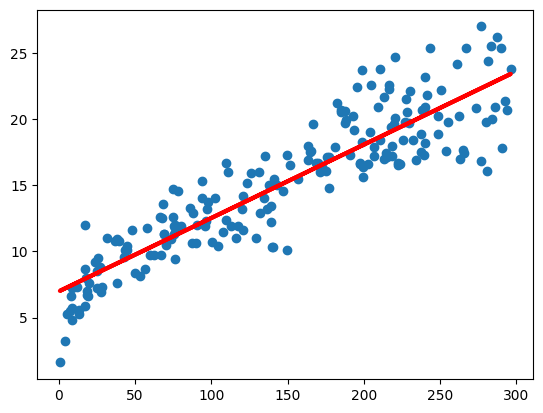

In [13]:
plt.scatter(X , y )
plt.plot(X, predictions , color='red' , linewidth=3);

In [14]:
model.predict([[200]])

array([18.06777558])

In [15]:
from sklearn import metrics
metrics.mean_absolute_error(y , predictions)

1.8305872641932417

The multiple linear regression equation is given by:

`Y = b₀ + b₁X₁ + b₂X₂ + ... + bₙXₙ`

where:
- `Y` is the dependent variable,
- `b₀` is the y-intercept,
- `b₁, b₂, ..., bₙ` are the coefficients,
- `X₁, X₂, ..., Xₙ` are the independent variables.


In [16]:
# multiple linear regression
df2 = df
df2

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [17]:
df2.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [18]:
X2 = df2[['TV','Radio','Newspaper']]
y2 = df2['Sales']
model2 = LinearRegression() 
model2.fit(X2,y2)

LinearRegression()

In [19]:
model2.intercept_  

4.625124078808653

In [20]:
model2.coef_ 

array([0.05444578, 0.10700123, 0.00033566])

In [21]:
model2.score(X2, y2) # R-squared

0.9025912899684558

In [22]:
# Adjusted R-squared
X2.shape

(200, 3)

In [23]:
r2 = model2.score(X2, y2)
n = X2.shape[0]
p = X2.shape[1]

adjusted_r2 = 1-((1-r2)*(n-1)/(n-p-1))
adjusted_r2
#if new usdful X4 variable is added to model : p increase from 3 to 4 ,adjusted_r2 should increase ,if it decrease -> useless variable

0.9011003403251159

In [24]:
#predicting
predictions2 = model2.predict(X2)
predictions2

array([21.22097209, 11.26824775, 10.49620897, 17.31244651, 15.64413685,
       10.35633677, 11.2732847 , 13.27062458,  5.31839603, 15.78871013,
        8.8527202 , 18.88400523,  9.69879662, 10.74921373, 19.27328852,
       20.38554445, 12.27105794, 24.20214502, 10.5924398 , 15.20872794,
       19.49794066, 18.10414656,  7.06177654, 18.87221072,  9.37145421,
       19.31996936, 15.54479137, 19.49216302, 21.07865408, 10.19471067,
       23.61492832, 12.64683045, 10.08782551, 21.2260486 ,  9.98787085,
       20.89407055, 23.84503494, 13.99342411,  9.8404516 , 21.08344935,
       18.04712878, 17.84885818, 23.57494339, 16.79762772,  8.75617872,
       16.57668108, 10.58020572, 22.13342743, 18.70257411,  9.53181337,
       15.84670856, 11.11990058, 20.88243422, 19.53008343, 22.01500291,
       20.76038994,  8.04320903, 14.10063486, 21.4222098 , 19.25650785,
        7.75915886, 23.43911942, 19.32168181, 13.3867616 , 16.35231896,
        9.37729644,  8.97313482, 13.7643628 , 20.49677834, 21.13

In [25]:
metrics.mean_absolute_error(y2 , predictions2)

1.2363919943957846

In [26]:
model2.predict([[100,20,30]])

array([12.21979642])